<a href="https://colab.research.google.com/github/among5094/AI_lecture/blob/main/5%EA%B0%95%2C6%EA%B0%95_KNN/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%95%EC%9D%986%EA%B0%95_KNN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC_%EC%99%80%EC%9D%B8%EC%A2%85%EB%A5%98%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
#와인데이터 가져오기
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine type']=wine.target #가장 끝에 타겟으로 와인타입 넣어주기

In [4]:
#데이터 확인
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
#'wine type'에 어떤 것들이 있는지 확인하기 -> unique()사용
df['wine type'].unique()

array([0, 1, 2])

In [6]:
# 표준화하기
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
wine_scaled=SS.fit_transform(wine.data)

In [7]:
#표준화된 데이터를 input데이터에 넣어주기
input =wine_scaled
output = df['wine type']

In [10]:
## split을 통해 Train Set, Test Set분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(
    input,output, test_size=0.2, random_state=42)

In [11]:
# KNN라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
#n_neighbors=3은 이론에서 배운 k값에 해당함
#근처에 3개의 데이터를 기준으로 자른다는 뜻임

In [15]:
# 학습시키기
knn.fit(train_input, train_output)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#성능 측정 -> 정확도 측정
knn.score(train_input, train_output)

0.9577464788732394

In [30]:
# k값 변경해보기
knn= KNeighborsClassifier(n_neighbors=3)
knn2= KNeighborsClassifier(n_neighbors=2) #2개 기준
knn3= KNeighborsClassifier(n_neighbors=5) #5개 기

In [31]:
# 학습시키기
knn.fit(train_input, train_output)
knn2.fit(train_input, train_output)
knn3.fit(train_input, train_output)

KNeighborsClassifier()

In [32]:
#정확도 측정,
knn.score(test_input, test_output), knn.score(train_input, train_output) #K=3일 때


#과적합 문제를 보기 위해서 train 데이터도 평가해봄(실제로 평가하진 않음)
#test데이터의 정확도가 train데이터보다 낮으면 => 과적합임
#k=3일때는 과적합x


(0.9444444444444444, 0.9577464788732394)

In [33]:
knn2.score(test_input, test_output), knn2.score(train_input, train_output) #K=2일 때
#과적합o

(0.9444444444444444, 0.971830985915493)

In [34]:
knn3.score(test_input, test_output), knn3.score(train_input, train_output) #K=5일 때
#과적합

(0.9444444444444444, 0.9859154929577465)

In [36]:
#그렇다면 K값을 얼마로 해야 좋은걸까?
# for문으로 최적의 k값 선정하기

#train데이터와 test데이터를 리스트로 만들기
acc_test=[]
acc_train=[]

#k값을 계속 바꿔보기
for i in range(1,100):
  knn_k = KNeighborsClassifier(n_neighbors=i)
  knn_k.fit(train_input, train_output)
  acc_test.append(knn_k.score(test_input, test_output)) #정확도에 k를 바꾼 값을 계속 추가
  acc_train.append(knn_k.score(train_input, train_output))

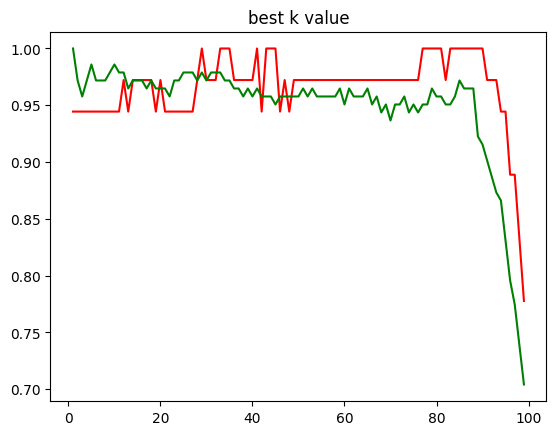

In [47]:
# 최적의 k값 선정을 위한 for문을 시각화해보기
plt.title("best k value")
plt.plot(range(1,100), acc_test, 'r')
plt.plot(range(1,100), acc_train, 'g')

#결과에 대해...
# k>=80이면 확 떨어진다. -> 과소적합(못맞추기시작, train과 test가 둘 다 떨어질 )

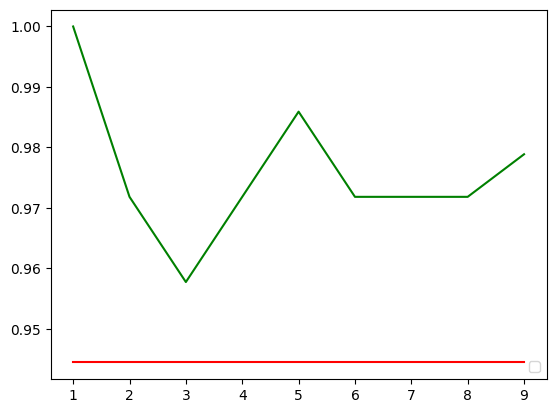

In [46]:
#10까지만 보기
plt.plot(range(1,10), acc_test[0:9], 'r')
plt.plot(range(1,10), acc_train[0:9], 'g')

#결과:
#초록색이 train인데 이게 빨간색(test) 보다 훨씬 위에 있음 -> 과적합상태